In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

# Utils

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

#def get_mnist():
mnist_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/lazyprogrammer/data/mnist.csv', header='infer')

if mnist_df.isna().sum().max() == 0:
  print('There is no NA values')
else:
  print(f'There are {mnist_df.isna().sum().max()} NAs' )

mnist_df.head()

Mounted at /content/gdrive/
There is no NA values


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def plot_misclasified_examples(x, true_lables, predicted_lables, n=5, print_misclassified=False, labels=None):
  misclassified_idx = np.where(predicted_lables != true_lables)[0]
  misclassified_random_idxes = np.random.choice(misclassified_idx, n*n)
  plt.figure(figsize=(15,15))
  for i in range(n*n):
      idx = misclassified_random_idxes[i]
      plt.subplot(n,n,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x[idx], cmap='gray')
      if labels==None:
        plt.xlabel("True  %s, Pred: %s" % (true_lables[idx], predicted_lables[idx]))
      else:
        plt.xlabel("True  %s, Pred: %s" % (labels[true_lables[idx]], labels[predicted_lables[idx]]))
  plt.show()

  if print_misclassified:
      if labels==None:
        print(pd.DataFrame({'idx':misclassified_random_idxes,
                        'true':true_lables[misclassified_random_idxes],
                        'pred':predicted_lables[misclassified_random_idxes]}))
      else:
        print(pd.DataFrame({'idx':misclassified_random_idxes,
                        #'true':labels[true_lables[misclassified_random_idxes]],
                        'true':true_lables[misclassified_random_idxes],
                        #'pred':labels[predicted_lables[misclassified_random_idxes]]}))
                        'pred':predicted_lables[misclassified_random_idxes]}))

def plot_examples(x, y, cmap='gray', labels=None):
  plt.figure(figsize=(15,15))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x[i], cmap=cmap)
      if labels==None:
        plt.xlabel(y[i])
      else:
        plt.xlabel(labels[y[i]])
  plt.show()

In [ ]:
def shuffle_pairs(X, Y):
  N = len(X)
  indexes = np.arange(N)
  np.random.shuffle(indexes)
  X = X[indexes]
  Y = Y[indexes]
  return X, Y


def get_mnist_data(should_shuffle = True, should_plot_examples=True):
  mnist_data = mnist_df.copy().values
  if (should_shuffle == True):
    np.random.shuffle(mnist_data)
  Y_mnist = mnist_data[:, 0]
  X_mnist = np.divide(mnist_data[:, 1:], 255.0)
  picture_shape = (28, 28)

  if (should_plot_examples == True):
    plot_examples(X_mnist.reshape((-1, *picture_shape)), Y_mnist, cmap='gray', labels=None)
  return X_mnist, Y_mnist, picture_shape


def get_xor_data(N=200, should_plot_data=True):
    X = np.zeros((N, 2))
    Nq = N // 4
    X[:Nq] = np.random.random((Nq, 2)) / 2 + 0.5 # (0.5-1, 0.5-1)
    X[Nq:2*Nq] = np.random.random((Nq, 2)) / 2 # (0-0.5, 0-0.5)
    X[2*Nq:3*Nq] = np.random.random((Nq, 2)) / 2 + np.array([[0, 0.5]]) # (0-0.5, 0.5-1)
    X[3*Nq:] = np.random.random((Nq, 2)) / 2 + np.array([[0.5, 0]]) # (0.5-1, 0-0.5)
    Y = np.array([0]*(N//2) + [1]*(N//2))

    X, Y = shuffle_pairs(X, Y)

    if (should_plot_data == True):
      plt.figure(figsize=(10,10))
      plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5);
      plt.title('Training data plot')
    return X, Y


def get_simple_xor(should_plot_data=True):
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 1, 1, 0])
    
    X, Y = shuffle_pairs(X, Y)

    if (should_plot_data == True):
      plt.figure(figsize=(10,10))
      plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5);
      plt.title('Training data plot')
    return X, Y


def get_donut_data(N=200, should_plot_data=True):
    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    
    X, Y = shuffle_pairs(X, Y)

    if (should_plot_data == True):
      plt.figure(figsize=(10,10))
      plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5);
      plt.title('Training data plot')
    return X, Y

In [ ]:
def get_perceptron_test_data(N=200, should_plot_data=True):
    w = np.array([-0.5, 0.5])
    b = 0.1
    X = np.random.random((N, 2))*2 - 1
    Y = np.sign(X.dot(w) + b)
    
    X, Y = shuffle_pairs(X, Y)

    if (should_plot_data == True):
      plt.figure(figsize=(10,10))
      plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5);
      plt.title('Training data plot')
    return X, Y

# Perceptron classifier class

In [ ]:
class PerceptronClassifier:
  def __init__(self):
    pass

  def fit(self, X, Y, epochs_num, learning_rate=0.001, trace_logs=True):
    N, D = X.shape
    self.w = np.random.randn(D) # / np.sqrt(D)
    self.b = 0

    score_history = []
    #print('epochs_num:', epochs_num)
    for i in range(epochs_num):
      #print('epoch:', i+1)
      #print('self.w:', self.w)
      predition = self.predict(X)
      #print('predition:', predition)
      #print('Y:', Y)
      misclassified_indexes = np.nonzero(predition != Y)[0]
      #print('misclassified_filter:', misclassified_filter)
      if (len(misclassified_indexes) == 0):
        break
      
      rand_idx = np.random.choice(misclassified_indexes)
      #print('rand_idx:', rand_idx)
      Y[rand_idx]
      X[rand_idx,:]
      self.w += learning_rate * Y[rand_idx] * X[rand_idx,:]
      self.b += learning_rate * Y[rand_idx] * 1

      current_score = self.score(X, Y)
      score_history.append(current_score)
      if (trace_logs & ((i+1) % (epochs_num//10) == 0)):
        print(f'On epoch {i+1}, w:{self.w}, b:{self.b}, score:{current_score}')
    
    print(f'Finished training after {i+1} epochs')
    return score_history


  def predict(self, X):
    return np.sign(X.dot(self.w) + self.b)
 

  def score(self, X, Y):
    predictions = self.predict(X)
    #print('predictions:', predictions)
    #print('true_Y:', Y)
    return np.mean(predictions == Y)

# Run model utils

In [ ]:
def run_model(X, Y, N=2000, epochs_num=1000, learning_rate=0.001, trace_logs=True):
  X_train, X_test = X[:N//2], X[N//2:N]
  Y_train, Y_test = Y[:N//2], Y[N//2:N]

  model = PerceptronClassifier()
  
  t0 = datetime.now()
  score_history = model.fit(X_train, Y_train, epochs_num, learning_rate, trace_logs)
  print(f'Fitted within {datetime.now()-t0} time')

  plt.figure(figsize=(10,10))
  plt.plot(score_history)
  plt.title('Training score history')

  t0 = datetime.now()
  acc = model.score(X_train,Y_train)
  print(f'Predicted within {datetime.now()-t0} time with train accuracy={acc}')
    
  t0 = datetime.now()
  acc = model.score(X_test,Y_test)
  print(f'Predicted within {datetime.now()-t0} time with test accuracy={acc}')

  return model

# Use KnnClassifier

## for special Perceptron test data

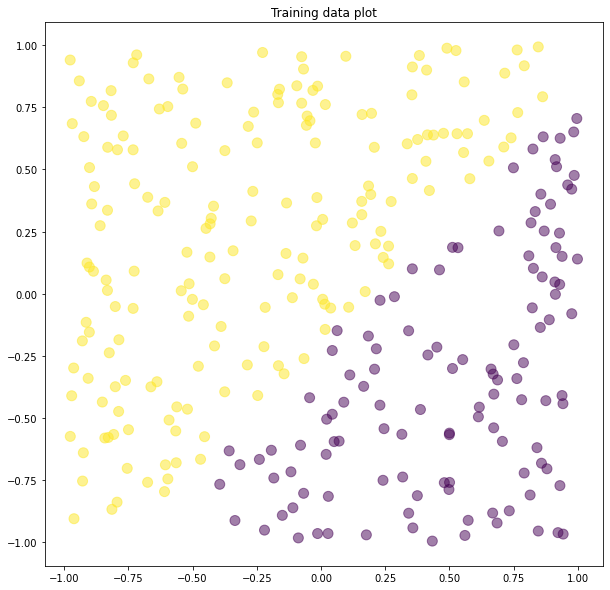

In [ ]:
N = 300
X, Y = get_perceptron_test_data(N)

On epoch 100, w:[-0.25136691  0.50599532], b:0.16, score:0.84
Finished training after 124 epochs
Fitted within 0:00:00.014087 time
Predicted within 0:00:00.000082 time with train accuracy=1.0
Predicted within 0:00:00.000053 time with test accuracy=0.9933333333333333
Estimated wiehts w: [-0.39705465  0.39231524]
Estimated bias b: 0.09


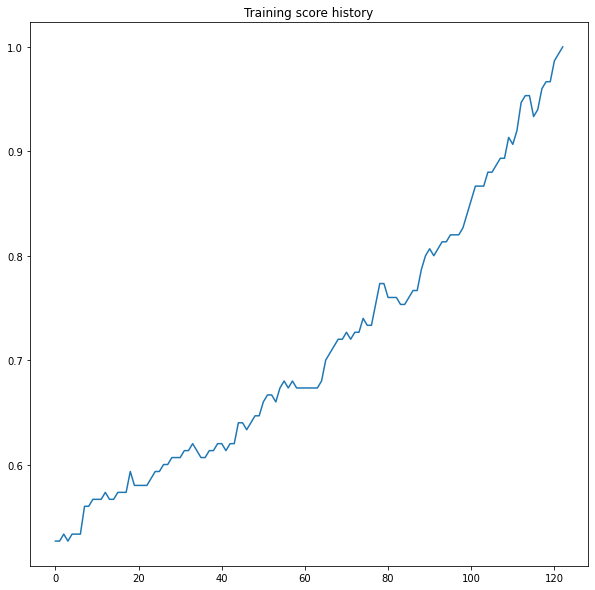

In [ ]:
m = run_model(X.copy(), Y.copy(), N, epochs_num=1000, learning_rate=0.01)
print(f'Estimated wiehts w:', m.w)
print(f'Estimated bias b:', m.b)

## for MNIST

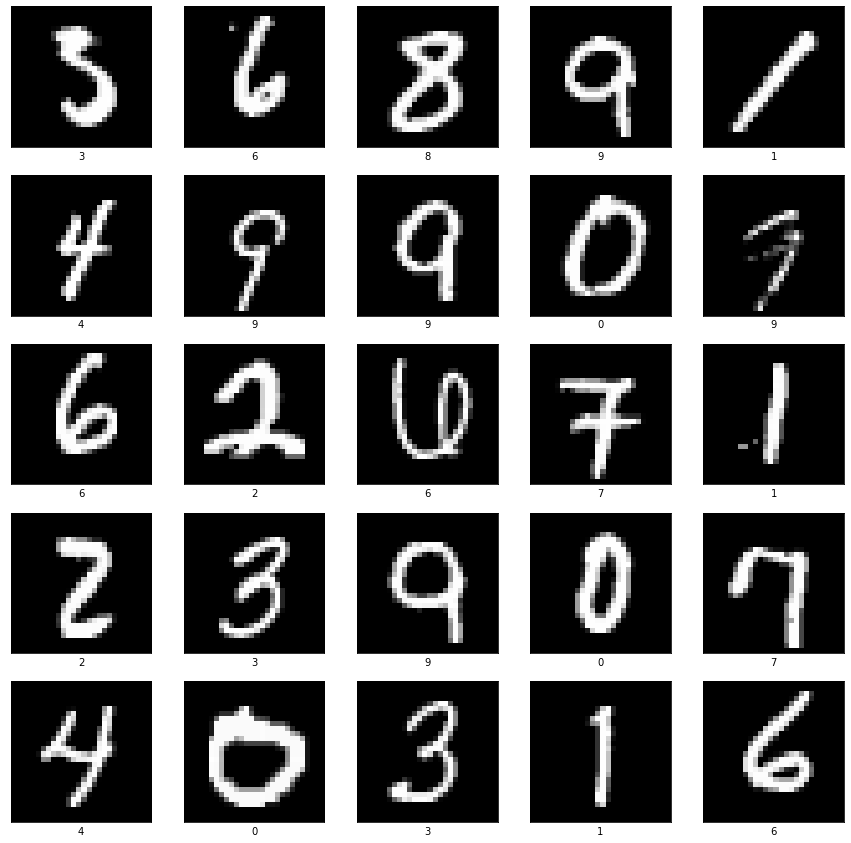

In [ ]:
X, Y, pic_shape = get_mnist_data()
idxs = np.logical_or(Y==0, Y==1)
X = X[idxs].copy()
Y = Y[idxs].copy()
Y[Y == 0] = -1

Finished training after 2000 epochs
Fitted within 0:00:09.360793 time
Predicted within 0:00:00.002524 time with train accuracy=0.9979582577132486
Predicted within 0:00:00.002736 time with test accuracy=0.9943284936479129


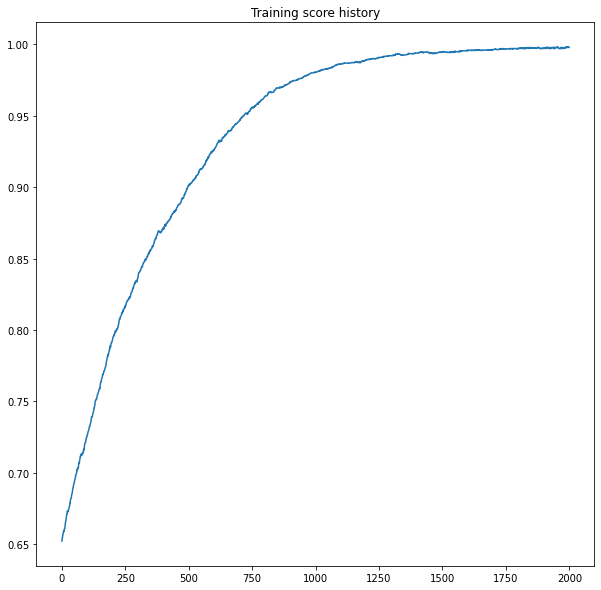

In [ ]:
N = len(Y)
run_model(X.copy(), Y.copy(), N, epochs_num=2000, learning_rate=0.001, trace_logs=False);

## for XOR

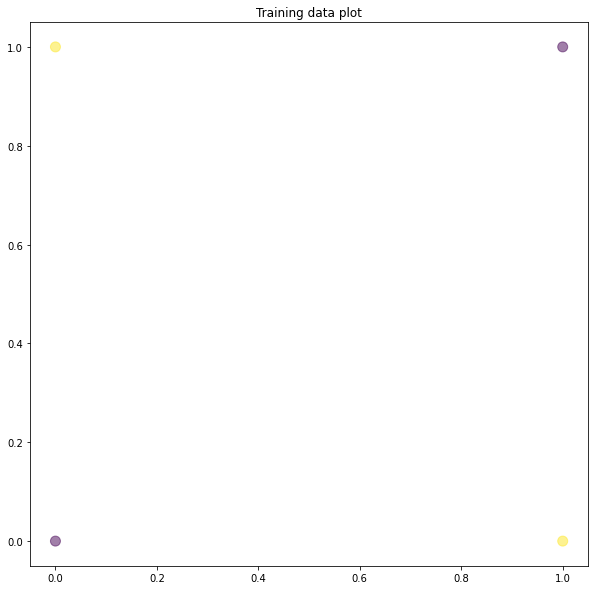

In [ ]:
X, Y = get_simple_xor()

On epoch 100, w:[-0.42445333 -0.45575147], b:0.47000000000000025, score:0.5
On epoch 200, w:[-0.42445333 -0.45575147], b:0.47000000000000025, score:0.5
On epoch 300, w:[-0.42445333 -0.45575147], b:0.47000000000000025, score:0.5
On epoch 400, w:[-0.42445333 -0.45575147], b:0.47000000000000025, score:0.5
On epoch 500, w:[-0.42445333 -0.45575147], b:0.47000000000000025, score:0.5
On epoch 600, w:[-0.42445333 -0.45575147], b:0.47000000000000025, score:0.5
On epoch 700, w:[-0.42445333 -0.45575147], b:0.47000000000000025, score:0.5
On epoch 800, w:[-0.42445333 -0.45575147], b:0.47000000000000025, score:0.5
On epoch 900, w:[-0.42445333 -0.45575147], b:0.47000000000000025, score:0.5
On epoch 1000, w:[-0.42445333 -0.45575147], b:0.47000000000000025, score:0.5
Finished training after 1000 epochs
Fitted within 0:00:00.062639 time
Predicted within 0:00:00.000162 time with train accuracy=0.5


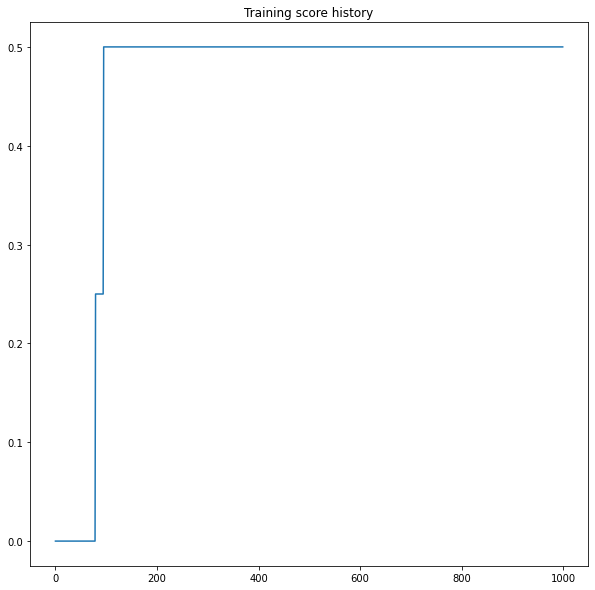

In [ ]:
  model = PerceptronClassifier()
  
  t0 = datetime.now()
  score_history = model.fit(X, Y, epochs_num=1000, learning_rate=0.01, trace_logs=True)
  print(f'Fitted within {datetime.now()-t0} time')

  plt.figure(figsize=(10,10))
  plt.plot(score_history)
  plt.title('Training score history')

  t0 = datetime.now()
  acc = model.score(X, Y)
  print(f'Predicted within {datetime.now()-t0} time with train accuracy={acc}')
    

## for Donut

Finished training after 2000 epochs
Fitted within 0:00:00.125454 time
Predicted within 0:00:00.000277 time with train accuracy=0.509
Predicted within 0:00:00.000794 time with test accuracy=0.491


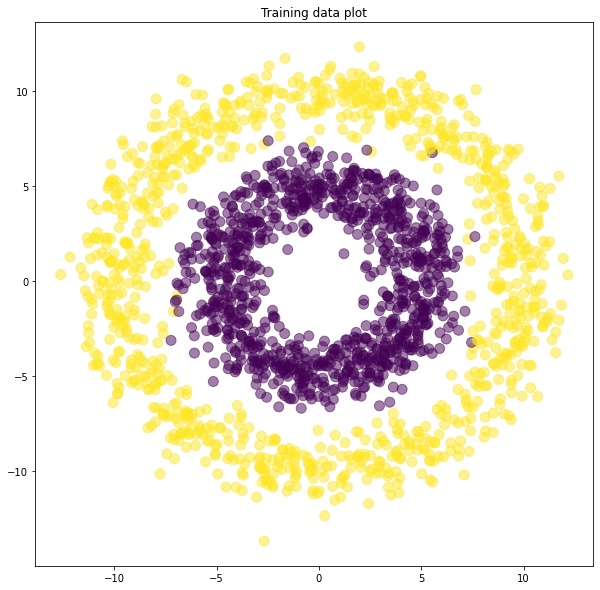

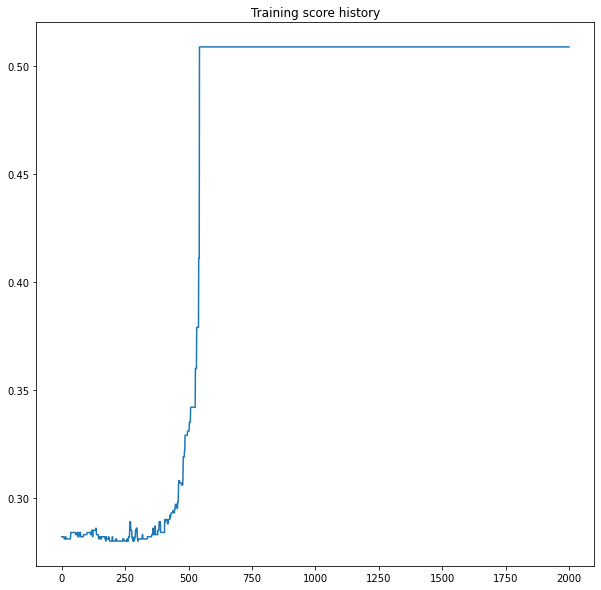

In [ ]:
N = 2000
X, Y = get_donut_data(N)
run_model(X.copy(), Y.copy(), N, epochs_num=2000, learning_rate=0.001, trace_logs=False);